In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read in the data and check it out

# weightlifting_clean.csv = set the weight-class of the "+" classes to the weightlifters' actual weight, rounded up to nearest 5kg
# weightlifting_v2.csv = set the weight-class of the "+" classes to the next-highest class + 5kg (109+ -> 114)
# sorry for the terrible naming of files

world_records = pd.read_csv("weightlifting_clean.csv", index_col=0)
world_records.head()

,Event,RecordKg,Athlete,Nation,Date,Meet,Place,WeightClassKg,Gender
0,Clean & Jerk,166,Om Yun-chol,North Korea,18 September 2019,World Championships,"Pattaya, Thailand",55,Men
1,Total,294,Om Yun-chol,North Korea,18 September 2019,World Championships,"Pattaya, Thailand",55,Men
2,Snatch,145,Li Fabin,China,19 September 2019,World Championships,"Pattaya, Thailand",61,Men
3,Clean & Jerk,175,Li Fabin,China,7 December 2022,World Championships,"Bogotá, Colombia",61,Men
4,Total,318,Li Fabin,China,19 September 2019,World Championships,"Pattaya, Thailand",61,Men


In [3]:
# Add in log columns, drop other columns, and take a look
world_records['Log10RecordKg'] = np.log10(world_records['RecordKg'])
world_records['Log10WeightClassKg'] = np.log10(world_records['WeightClassKg'])
world_records.drop(['Meet', 'Date', 'Place'], axis=1, inplace=True)
world_records.head()

,Event,RecordKg,Athlete,Nation,WeightClassKg,Gender,Log10RecordKg,Log10WeightClassKg
0,Clean & Jerk,166,Om Yun-chol,North Korea,55,Men,2.220108,1.740363
1,Total,294,Om Yun-chol,North Korea,55,Men,2.468347,1.740363
2,Snatch,145,Li Fabin,China,61,Men,2.161368,1.785330
3,Clean & Jerk,175,Li Fabin,China,61,Men,2.243038,1.785330
4,Total,318,Li Fabin,China,61,Men,2.502427,1.785330


In [4]:
# Let's look at the range of the logs
world_records.groupby(['Gender', 'Event']).agg({'Log10RecordKg' : ['min', 'max'], 'Log10WeightClassKg' : ['min', 'max']})

Log10RecordKg           Log10WeightClassKg          
                              min       max                min       max
Gender Event                                                            
Men    Clean & Jerk      2.220108  2.426511           1.740363  2.267172
       Snatch            2.161368  2.352183           1.785330  2.267172
       Total             2.468347  2.691965           1.740363  2.267172
Women  Clean & Jerk      2.075547  2.271842           1.690196  2.190332
       Snatch            1.982271  2.170262           1.690196  2.190332
       Total             2.328380  2.525045           1.690196  2.190332

Looks like we have <1 order of magnitude for each of the groups.

In [5]:
genders = world_records['Gender'].unique()
events = world_records['Event'].unique()

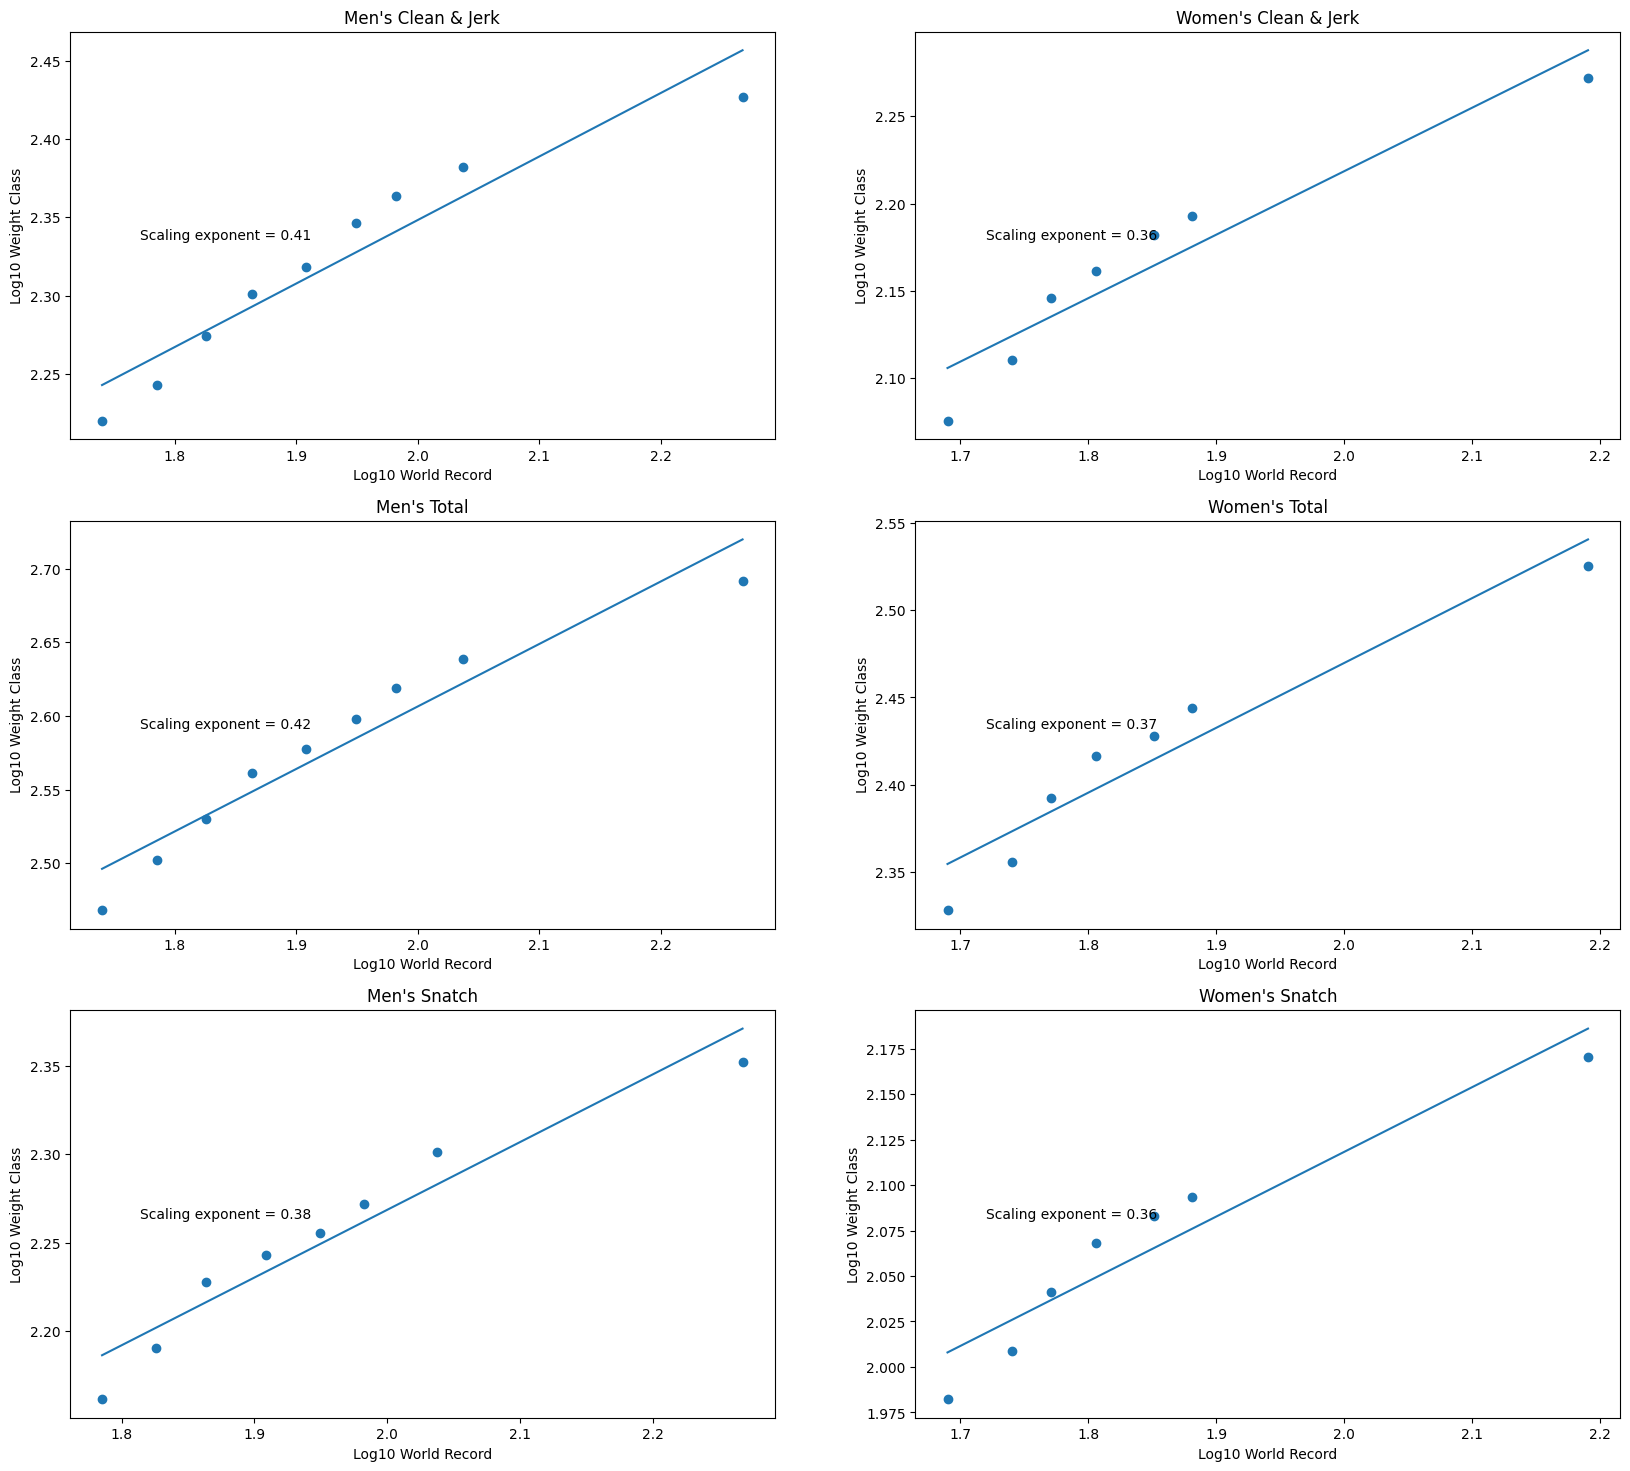

In [10]:
fit_info = list()

def fit_and_plot(i, j, gender, event):
    # Get data for this subplot
    x = world_records[(world_records['Gender']==gender) & (world_records['Event']==event)]['Log10WeightClassKg']
    y = world_records[(world_records['Gender']==gender) & (world_records['Event']==event)]['Log10RecordKg']

    # Get and save fit info for this subplot
    slope, intercept = np.polyfit(x, y, 1)
    fit_info_line = [gender, event, slope, intercept]
    fit_info.append(fit_info_line)
    # fit_info.setdefault(gender, {})
    # fit_info[gender].setdefault(event, {'slope': None, 'intercept': None})
    # fit_info[gender][event]['slope'] = slope
    # fit_info[gender][event]['intercept'] = intercept
    fit_y = np.poly1d((slope, intercept))(x)
    scaling_text = f"Scaling exponent = {slope:.2f}"

    # Create the plot
    ax[j, i].scatter(x, y, color='tab:blue')
    ax[j, i].plot(x, fit_y)
    ax[j, i].set_xlabel('Log10 World Record')
    ax[j, i].set_ylabel('Log10 Weight Class')
    ax[j, i].title.set_text(gender + "'s " + event)
    ax[j, i].text(0.1, 0.5, scaling_text, horizontalalignment='left', verticalalignment='center', transform=ax[j,i].transAxes)

fig, ax = plt.subplots(len(events), len(genders), figsize=(20,18))

for i, gender in enumerate(genders):
    for j, event in enumerate(events):
        fit_and_plot(i, j, gender, event)


In [19]:
fit_df = pd.DataFrame(fit_info, columns=['Gender', 'Event', 'Beta', 'Log10c'])
fit_df['c'] = 10**fit_df['Log10c']
fit_df.head(10)

,Gender,Event,Beta,Log10c,c
0,Men,Clean & Jerk,0.405667,1.536954,34.431330
1,Men,Total,0.424389,1.757722,57.242891
2,Men,Snatch,0.383734,1.501153,31.706852
3,Women,Clean & Jerk,0.363907,1.490733,30.955122
4,Women,Total,0.371315,1.727123,53.348641
5,Women,Snatch,0.355971,1.406316,25.486840


In [21]:
world_records.head()

,Event,RecordKg,Athlete,Nation,WeightClassKg,Gender,Log10RecordKg,Log10WeightClassKg
0,Clean & Jerk,166,Om Yun-chol,North Korea,55,Men,2.220108,1.740363
1,Total,294,Om Yun-chol,North Korea,55,Men,2.468347,1.740363
2,Snatch,145,Li Fabin,China,61,Men,2.161368,1.785330
3,Clean & Jerk,175,Li Fabin,China,61,Men,2.243038,1.785330
4,Total,318,Li Fabin,China,61,Men,2.502427,1.785330


In [25]:
normalization = world_records.merge(fit_df, on=['Gender', 'Event'])
normalization.head(20)

,Event,RecordKg,Athlete,Nation,WeightClassKg,Gender,Log10RecordKg,Log10WeightClassKg,Beta,Log10c,c
0,Clean & Jerk,166,Om Yun-chol,North Korea,55,Men,2.220108,1.740363,0.405667,1.536954,34.431330
1,Clean & Jerk,175,Li Fabin,China,61,Men,2.243038,1.785330,0.405667,1.536954,34.431330
2,Clean & Jerk,188,Pak Jong-ju,North Korea,67,Men,2.274158,1.826075,0.405667,1.536954,34.431330
3,Clean & Jerk,200,Rahmat Erwin Abdullah,Indonesia,73,Men,2.301030,1.863323,0.405667,1.536954,34.431330
4,Clean & Jerk,208,Karlos Nasar,Bulgaria,81,Men,2.318063,1.908485,0.405667,1.536954,34.431330
5,Clean & Jerk,222,Tian Tao,China,89,Men,2.346353,1.949390,0.405667,1.536954,34.431330
6,Clean & Jerk,231,Tian Tao,China,96,Men,2.363612,1.982271,0.405667,1.536954,34.431330
7,Clean & Jerk,241,Ruslan Nurudinov,Uzbekistan,109,Men,2.382017,2.037426,0.405667,1.536954,34.431330
8,Clean & Jerk,267,Lasha Talakhadze,Georgia,185,Men,2.426511,2.267172,0.405667,1.536954,34.431330
9,Total,294,Om Yun-chol,North Korea,55,Men,2.468347,1.740363,0.424389,1.757722,57.242891


In [28]:
normalization['normalized'] = 100 * (normalization['RecordKg'] / (normalization['c'] * (normalization ['WeightClassKg'] ** normalization['Beta'])) -1)

In [29]:
normalization.head(20)

,Event,RecordKg,Athlete,Nation,WeightClassKg,Gender,Log10RecordKg,Log10WeightClassKg,Beta,Log10c,c,normalized
0,Clean & Jerk,166,Om Yun-chol,North Korea,55,Men,2.220108,1.740363,0.405667,1.536954,34.431330,-5.126014
1,Clean & Jerk,175,Li Fabin,China,61,Men,2.243038,1.785330,0.405667,1.536954,34.431330,-4.096284
2,Clean & Jerk,188,Pak Jong-ju,North Korea,67,Men,2.274158,1.826075,0.405667,1.536954,34.431330,-0.819485
3,Clean & Jerk,200,Rahmat Erwin Abdullah,Indonesia,73,Men,2.301030,1.863323,0.405667,1.536954,34.431330,1.903291
4,Clean & Jerk,208,Karlos Nasar,Bulgaria,81,Men,2.318063,1.908485,0.405667,1.536954,34.431330,1.601651
5,Clean & Jerk,222,Tian Tao,China,89,Men,2.346353,1.949390,0.405667,1.536954,34.431330,4.375031
6,Clean & Jerk,231,Tian Tao,China,96,Men,2.363612,1.982271,0.405667,1.536954,34.431330,5.321444
7,Clean & Jerk,241,Ruslan Nurudinov,Uzbekistan,109,Men,2.382017,2.037426,0.405667,1.536954,34.431330,4.363158
8,Clean & Jerk,267,Lasha Talakhadze,Georgia,185,Men,2.426511,2.267172,0.405667,1.536954,34.431330,-6.708635
9,Total,294,Om Yun-chol,North Korea,55,Men,2.468347,1.740363,0.424389,1.757722,57.242891,-6.236100


In [33]:
idx = normalization.groupby(['Gender', 'Event'])['normalized'].transform(max) == normalization['normalized']
normalization[idx]

/var/folders/wp/lq_w646n77jc1slxh2r_13f00000gn/T/ipykernel_26248/7619462.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  idx = normalization.groupby(['Gender', 'Event'])['normalized'].transform(max) == normalization['normalized']


,Event,RecordKg,Athlete,Nation,WeightClassKg,Gender,Log10RecordKg,Log10WeightClassKg,Beta,Log10c,c,normalized
6,Clean & Jerk,231,Tian Tao,China,96,Men,2.363612,1.982271,0.405667,1.536954,34.431330,5.321444
15,Total,416,Sohrab Moradi,Iran,96,Men,2.619093,1.982271,0.424389,1.757722,57.242891,4.741413
24,Snatch,200,Yang Zhe,China,109,Men,2.301030,2.037426,0.383734,1.501153,31.706852,4.242923
29,Snatch,117,Deng Wei,China,64,Women,2.068186,1.806180,0.355971,1.406316,25.486840,4.453177
38,Clean & Jerk,156,Zhang Wangli,China,76,Women,2.193125,1.880814,0.363907,1.490733,30.955122,4.219968
43,Total,261,Deng Wei,China,64,Women,2.416641,1.806180,0.371315,1.727123,53.348641,4.437152
